In [1]:
import sys
sys.path.append('../')

## Import Libraries

In [2]:
import numpy as np
import cv2
from IPython.display import display, Image
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import skimage.io as io
import random
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from utils.COCOKeyPointsDatasetForRCNN import COCOKeyPointsDatasetForRCNN
import torch

In [3]:
%matplotlib inline

##  Load the COCO Keypoint Annotations

In [4]:
# specify the path to the annotation file and images
ann_file = '.\\..\\Dataset\\annotations\\person_keypoints_train2017.json'
coco = COCO(ann_file)

loading annotations into memory...
Done (t=7.46s)
creating index...
index created!


## Get IDs for the 'person' Category

In [5]:
person_cat_ids = coco.getCatIds(catNms=['person'])

## Get Image IDs for Images Containing People

In [6]:
person_img_ids = coco.getImgIds(catIds=person_cat_ids)

##  Extract Image File Paths and Their Annotations

In [7]:
person_images = coco.loadImgs(person_img_ids)
person_annotations = [coco.loadAnns(coco.getAnnIds(imgIds=img['id'], catIds=person_cat_ids, iscrowd=None)) for img in person_images]

In [8]:
# Check the number of images and annotations
print('Number of person images: {}'.format(len(person_images)))
print('Number of person annotations: {}'.format(len(person_annotations)))

Number of person images: 64115
Number of person annotations: 64115


In [9]:
# Check first image and its annotations
print('First image:')
print(person_images[0])
print('First image annotations:')
print(person_annotations[0])


First image:
{'license': 2, 'file_name': '000000262145.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000262145.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-20 02:07:55', 'flickr_url': 'http://farm8.staticflickr.com/7187/6967031859_5f08387bde_z.jpg', 'id': 262145}
First image annotations:
[{'segmentation': [[453, 292.1, 457, 253.1, 439, 245.1, 438, 215.1, 439, 198.1, 420, 223.1, 414, 233.1, 401, 227.1, 400, 226.1, 398, 229.1, 391, 231.1, 387, 213.1, 399, 203.1, 404, 200.1, 413, 194.1, 418, 186.1, 408, 181.1, 415, 154.1, 418, 142.1, 419, 127.1, 422, 125.1, 419, 120.1, 412, 122.1, 407, 112.1, 402, 105.1, 389, 113.1, 390, 105.1, 395, 100.1, 395, 97.1, 398, 83.1, 407, 72.1, 417, 71.1, 424, 72.1, 428, 73.1, 436, 80.1, 441, 90.1, 446, 96.1, 456, 101.1, 472, 110.1, 480, 113.1, 493, 123.1, 499, 136.1, 504, 147.1, 509, 167.1, 515, 182.1, 531, 205.1, 532, 218.1, 525, 229.1, 514, 246.1, 499, 283.1, 499, 307.1, 499, 323.1, 499, 343.1, 505, 367.1, 505, 380.1, 505, 381

## Loading and Visualizing Annotations

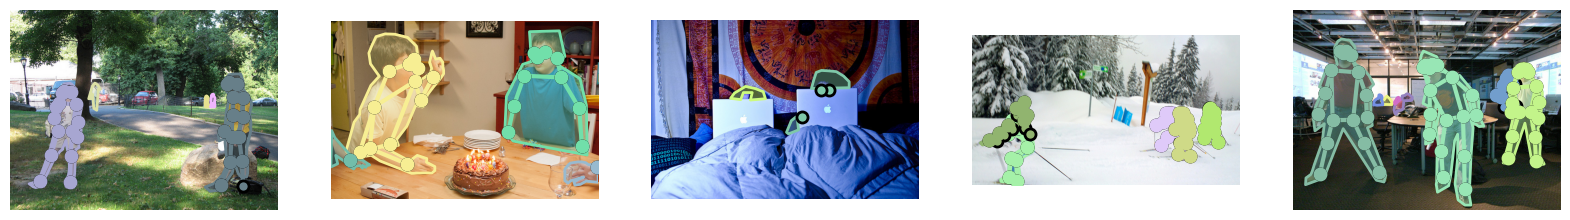

In [10]:
n = 5
selected_img_ids = random.sample(person_img_ids, n)
plt.figure(figsize=(20, 10))
for idx, img_id in enumerate(selected_img_ids, 1):
    img_data = coco.loadImgs(img_id)[0]
    img = io.imread(img_data['coco_url'])
    
    plt.subplot(1, n, idx)
    plt.imshow(img)
    plt.axis('off')
    
    ann_ids = coco.getAnnIds(imgIds=img_id, catIds=person_cat_ids, iscrowd=None)
    anns = coco.loadAnns(ann_ids)
    coco.showAnns(anns)

plt.show()

In [11]:
train_annotation_file ='.\\..\\Dataset\\annotations\\person_keypoints_train2017.json'
train_image_folder = '.\\..\\Dataset\\train2017\\'
val_annotation_file = '.\\..\\Dataset\\annotations\\person_keypoints_val2017.json'
val_image_folder = '.\\..\\Dataset\\val2017\\'
test_image_folder = '.\\..\\Dataset\\test2017\\'

In [12]:
train_dataset = COCOKeyPointsDatasetForRCNN(train_annotation_file, train_image_folder)
val_dataset = COCOKeyPointsDatasetForRCNN(val_annotation_file, val_image_folder)


loading annotations into memory...
Done (t=6.74s)
creating index...
index created!
loading annotations into memory...
Done (t=0.25s)
creating index...
index created!


In [13]:
print('Number of training images: {}'.format(len(train_dataset)))
print('Number of validation images: {}'.format(len(val_dataset)))

Number of training images: 64115
Number of validation images: 2693


In [14]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=0)